Epoch 1/2
6607/6607 [==============================] - 6s 978us/step - loss: 37.6828 - accuracy: 0.9968
Epoch 2/2
62/62 [==============================] - 0s 932us/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.0 lr: 0.01
Epoch 1/2
6607/6607 [==============================] - 6s 975us/step - loss: 25.4164 - accuracy: 0.8794
Epoch 2/2
62/62 [==============================] - 0s 964us/step - loss: 0.3780 - accuracy: 0.8744
Test accuracy: 0.8743693232536316 lr: 0.05
Epoch 1/2
6607/6607 [==============================] - 7s 998us/step - loss: 96.9265 - accuracy: 0.9983
Epoch 2/2
62/62 [==============================] - 0s 983us/step - loss: 4.0344e-05 - accuracy: 1.0000
Test accuracy: 1.0 lr: 0.1
Epoch 1/2
6607/6607 [==============================] - 7s 990us/step - loss: 21.9066 - accuracy: 0.9983
Epoch 2/2
62/62 [==============================] - 0s 953us/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.0 lr: 0.15
Epoch 1/2
6607/6607 [=============================

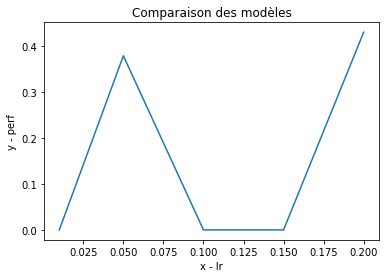

Epoch 1/2
6607/6607 [==============================] - 7s 1ms/step - loss: 9.4756 - accuracy: 0.9983
Epoch 2/2
2672/2672 [==============================] - 3s 979us/step - loss: 876.8973 - accuracy: 0.9926
Test accuracy: 0.9925954341888428


In [ ]:
#imports nécessaires
#----------------------------------------------------------#
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt 
#----------------------------------------------------------#
# Authorisation de connexion au Google Drive
#----------------------------------------------------------#
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#----------------------------------------------------------#
#Création de graphs
#----------------------------------------------------------#
def graph(lr,perf): 
  plt.plot(lr, perf) 
  plt.xlabel('x - lr') 
  plt.ylabel('y - perf') 
  plt.title('Comparaison des modèles')  
  plt.show()
#----------------------------------------------------------#
#Importation des données de fichiers depuis un chemin
#----------------------------------------------------------#
def add_line_from_file(path,myarray,y=[],data=-1):
  with open(path) as filein:
    for line in filein:
      line = line.replace('\n','')
      line = line.split(',') 
      myarray.append([ int(i) for i in line[1:]])
      y.append([data])
  filein.close()
  return myarray,y
#----------------------------------------------------------#
#Charger un model
#----------------------------------------------------------#
'''
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/my_model')
print('Val accuracy:', val_acc)
'''
#----------------------------------------------------------#
myarray = []
y = []
#Importation des données
#----------------------------------------------------------#
add_line_from_file('/content/drive/My Drive/Colab Notebooks/Normal/Normal_file14.txt',myarray,y,0) #Il faudrat changer le Path
add_line_from_file('/content/drive/My Drive/Colab Notebooks/Malware/Malware_file25.txt',myarray,y,1) #Il faudrat changer le Path
#----------------------------------------------------------#
'''
Nous sauvegardons tout les jeux de données dans myarray et nous enregistrons le type des données dans y.
C'est à dire pour les données qui sont des Malware nous sauvegardons les données dans myarray et nous ajoutons le type :
0 pour Normal et 1 Malware
'''
#Paramétrage des donnèes pour les tests et validation
#----------------------------------------------------------#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(myarray, y, test_size=0.3, random_state=2) #Nous donnons 0.3 pour les tests
X_test_final, X_val, y_test_final, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=2) #Nous donnons 0.3 pour la validation
h1,h2 = 16,16
#h1 et h2 sont le nombres de noeuds pour chaque couche 
#----------------------------------------------------------#
#Réseau de neurones
#----------------------------------------------------------#
'''
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20,)),
    keras.layers.Dense(h1, activation=tf.nn.relu),
    keras.layers.Dense(h2, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
]
'''
#----------------------------------------------------------#
#Linéaire
#----------------------------------------------------------#
'''
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20,)),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
#----------------------------------------------------------#
'''
#On fait varier les paramètres du learning rate pour trouver le meilleur afin de l'appliquer à la validation
#Tests des données
#----------------------------------------------------------#
best = 0
best_lr = 0
tlr = [0.01,0.05,0.1,0.15,0.20]
tperf=[]
for lr in tlr :
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20,)), # Ici le 20 fait référence au nombre de colonnes 
    keras.layers.Dense(h1, activation=tf.nn.relu), #Nous mettons une fonction Relu
    keras.layers.Dense(h2, activation=tf.nn.relu), #Nous mettons une fonction Relu
    keras.layers.Dense(1, activation=tf.nn.sigmoid), #Nous mettons une fonction Sigmoid pour faire la classification en classe Malware et Normal
    ])
  opt = keras.optimizers.Adam(learning_rate=lr) #Lr qui change à chaque fois
  model.compile(optimizer=opt,
              loss='binary_crossentropy', #La Loss function est une binary_crossentropy
              metrics=['accuracy'])
  model.fit(X_train, y_train, epochs=2, batch_size=1) # Nous mettons 2 epoques car nous avon un batch_size de 1
  test_loss, test_acc = model.evaluate(X_test_final, y_test_final)
  tperf.append(test_loss)
  print('Test accuracy:', test_acc, "lr:",lr)
  if test_acc > best:
    best = test_acc
    best_lr = lr
graph(tlr,tperf)
#----------------------------------------------------------#
#Validation des données
#----------------------------------------------------------#
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20,)),
    keras.layers.Dense(h1, activation=tf.nn.relu),
    keras.layers.Dense(h2, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])
opt = keras.optimizers.Adam(learning_rate=best_lr)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2, batch_size=1) # Nous mettons 2 epoques car nous avon un batch_size de 1
val_loss, val_acc = model.evaluate(X_val, y_val)
#----------------------------------------------------------#
#Sauver le modèle
#----------------------------------------------------------#
'''
model.save('/content/drive/My Drive/Colab Notebooks/my_model_lineaire')
'''
#----------------------------------------------------------#
#Test sur d'autres jeux de données
#----------------------------------------------------------#
mixed=[]
y1=[]
add_line_from_file('/content/drive/My Drive/Colab Notebooks/Malware/Malware_file26.txt',mixed,y1,1)
add_line_from_file('/content/drive/My Drive/Colab Notebooks/Normal/Normal_file12.txt',mixed,y1,0)
test_loss, test_acc = model.evaluate(mixed,y1)
print('Test accuracy:',test_acc)

# Nouvelle section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')